# Cleaning and Analyzing Employee Exit Surveys

In this project we'll work with exit surveys from employees of the Department of Education , Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). 

## Introduction and Goals

We'll play the role of data analyst and pretend our stakeholders want to know the following question:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

* *ID*: An id used to identify the participant of the survey
* *SeparationType*: The reason why the person's employment ended
* *Cease Date*: The year or month the person's employment ended
* *DETE Start Date*: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

* *Record ID*: An id used to identify the participant of the survey
* *Reason for ceasing employment*: The reason why the person's employment ended
* *LengthofServiceOverall. Overall Length of Service at Institute (in years):* The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them.


In [125]:
#Reading the data
import numpy as np
import pandas as pd

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [126]:
#Quick exploration of the data
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [127]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [128]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [129]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [130]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [131]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

## Observations

Throught the data explorations methods we use above , we can make some observations :

* dete_survey dataframe contains "Not Stated" values , as we can see in the "DETE start date" column , that indicates values are missing but they aren't represented as "NaN".
* Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same column , but the names are different.
* There are many columns that indicates an employee resigned because of dissatisfaction.

# Data Cleaning

## Identify Missing Values and Drop Unneccessary Columns

To start , we'll handle the first two issues. We'll use the pd.read_csv function to specify values that should be represented as NaN , in our specific case we want the value "Not Stated" to be reprented as "Nan".

Then we'll drop columns we don't need for our analysis.
In the DETE dataframe we can say that the columns in the range from 28 to 48 are not in our interest (some example : *"Stress andpressure support"* , *"Communication"* , *"Wellness programs"*)
and we can say the same for columns in TAFE dataframe in the range from 17 to 65 (some examples: *'WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance'* , *'InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently'* ).

In [132]:
#Reading the data again, setting "Non Stated" values as "NaN"
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

#Removing rows we don't need for our analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Rename Columns

Next, let's turn our attention to the column names. Each dataframes contains many of the same column but the column names are different (for example *"ID"* vs *"Record ID"*).

Because we want eventually to combine them , we have to standardize the column names. In the lines above we have used some vectorized string methods to update all columns at once.

We have used the snake case notation and we changed some TAFE dataframe columns name through rename method.

In [133]:
#Cleaning the columns name
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")

#TAFE columns name to change
cols_name_to_change = {'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(columns=cols_name_to_change, inplace=True)



In [134]:
#Checking the changes made
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [135]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Filter the Data

For this project , we'll only analyze survey respondents to *resigned* , so their separation type contains the string "Resignation". We use this fact to consider only the rows useful for our purpose 

In [136]:
#Checking the unique value for the separationtype column
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [137]:
#Checking the unique value for the separationtype column
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [138]:
#Updating the separationtype column
dete_survey_updated["separationtype"] = dete_survey_updated["separationtype"].str[:11] 

#Selecting only the resignation separation types from both dataframes
dete_resignations  = dete_survey_updated[dete_survey_updated["separationtype"] == "Resignation"].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"] == "Resignation"].copy()

## Verify the Data

In this step we'll verify that the data doesn't contain any major inconsistencies. We will focus on verifying that the years in the *cease_date* and *dete_start_date* columns make sense. 

Since the *cease_date* is the last year of the person's employment and the *dete_start_date* is the person's first year of employment we can say that *cease_date* shouldn't have years after the current date and *dete_start_date* shouldn't have values lower than 1940 considering that most people's in the field start working in their 20s.

If we have many wrong values , we wouldn't want to continue with our analysis before have fixed them.

In [139]:
#Checking the unique values
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [140]:
#Extracting the year
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1]
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)

#Checking the values again
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [141]:
#Checking the unique values
dete_resignations["dete_start_date"].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [142]:
#Checking the unique values 
tafe_resignations["cease_date"].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

### Observations

The years in both dataframes are not completely aligned.
For example in the TAFE dataframe there are some "2009" values that is a missing value in DETE dataframe. Since we are not concerned in analyzing the results by year , we'll leave them as is. 

## Create a New Column

Recall that our end goal is to answer the following question :

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the TAFE dataframe there is a *service* column which we renamed *institute_service* , in the DETE dataframe such a column is absent though.
We'll have to create a corresponding column in the DETE dataframe.

In [143]:
#Creating a new column
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

#Quick check of the result
dete_resignations["institute_service"].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identify Unsatisfied Employees

Below are the columns we'll use to categorize employees as "unsatisfied" from each dataframe :

1. tafe_survey_updated:
    * *Contributing Factors. Dissatisfaction* 
    * *Contributing Factors. Job Dissatisfaction*
2. dete_survey_updated:
    * *job_dissatisfaction*
    * *dissatisfaction_with_the_department*
    * *physical_work_environment*
    * *lack_of_recognition*
    * *lack_of_job_security*
    * *work_location*
    * *employment_conditions*
    * *work_life_balance*
    * *workload*

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.
The column will have only 3 possible values :

* *True*: If a person resigned because of dissatisfaction reasons
* *False*: If a person resigned beacuase of other reason not connected with the job
* *Nan*: Value missing

In [144]:
#Checking the unique values
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [145]:
#Checking the unique values
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [146]:
#Updating the values in the TAFE dataframe
def update_vals(x):
    if pd.isnull(x):
        return np.nan
    elif(x=="-"):
        return False
    else:
        return True
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

#Checking the unique values
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [147]:
#Updating values in the DETE dataframe
dete_resignations["dissatisfied"] = dete_resignations[["job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment", "lack_of_recognition", "lack_of_job_security", "work_location", "employment_conditions", "work_life_balance", "workload"]].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

#Checking the unique values
dete_resignations_up["dissatisfied"].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Data

Let's add a column to each dataframe that allows us to easily distinguish between the two. After that we'll combine the dataframes and drop any remaining columns we don't need.

In [148]:
#Adding a column to each dataframe
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

#Combining the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

#Verifying the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [149]:
#Removing any columns with less than 500 non null values
combined_updated = combined.dropna(thresh=500, axis=1).copy()

## Clean the Service Column

We'll have to clean up the *institute_service* column because it currently contains values in a couple of different forms.

To analyze the data, we'll convert all the values into 4 categories:

* *New*: Less than 3 years at a company
* *Experienced*: 3-6 years at a company
* *Established*: 7-10 years at a company
* *Veteran*: 11 or more years at a company

Let's categorize the values in the *institute_service* column using the definitions above.


In [150]:
#Checking the unique values
combined_updated["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2
27.0                   1


In [151]:
#Extracting the years of service
combined_updated["institute_service_up"] = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)")
combined_updated["institute_service_up"] = combined_updated['institute_service_up'].astype('float')

#Checking the years
combined_updated["institute_service_up"].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [152]:
#Converting years of service to categories
def convert_years(x):
    if x<3:
        return "New"
    elif x>=3 and x<7:
        return "Experienced"
    elif x>=6 and x<11:
        return "Established"
    elif pd.isnull(x):
        return np.nan
    else:
        return "Veteran"
combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(convert_years) 

#Checking the unique values
combined_updated["service_cat"].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Aggregate Data

We'll replace the missing values in the *dissatisfied* column with the most common value that is *False*. Then we'll calculate the percentage of people who resigned due to dissatisfaction and plot the results.

In [153]:
#Checking the unique values
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [159]:
#Filling the missing values with the most common value, False
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna("False")

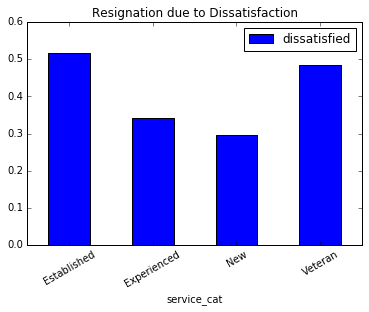

In [162]:
#Calculating the percentage of employees resigned due to dissatisfaction
percentage = combined_updated.pivot_table(index="service_cat", values="dissatisfied")

#Plotting the results
%matplotlib inline
percentage.plot(kind="bar", title="Resignation due to Dissatisfaction", rot=30)

# Conclusion

We can note that people who have been working for a long time in the company (more than 7 years of experience) are more likely to resign due to dissatisfaction (around 50%), people who have been working for a shorter time in the company (less than 7 years) resign due to dissatisfaction with a mean percentage of about 32%. 
Over the years and experience , the average dissatisfaction of employees seems to increase.